In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


# Read the CSV files
ev_makers = pd.read_csv('electric_vehicle_sales_by_makers.csv', encoding='UTF-8-SIG')
ev_states = pd.read_csv('electric_vehicle_sales_by_state.csv', encoding='UTF-8-SIG')
dim_date = pd.read_csv('dim_date.csv', encoding='UTF-8-SIG')

# Display the first few rows of each dataframe
print("Electric Vehicle Sales by Makers:")
ev_makers.head()


# Display basic information about each dataframe
print("\
Dataframe Info:")
print("\
Electric Vehicle Sales by Makers:")
print(ev_makers.info())
print("\
Electric Vehicle Sales by State:")
print(ev_states.info())
print("\
Date Dimension:")
print(dim_date.info())

Electric Vehicle Sales by Makers:
Dataframe Info:
Electric Vehicle Sales by Makers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB
None
Electric Vehicle Sales by State:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   

In [3]:
# Display the first few rows of each dataframe
print("Electric Vehicle Sales by Makers:")
ev_makers.head()

Electric Vehicle Sales by Makers:


,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [4]:
ev_states.shape,ev_states.ndim,ev_states.columns

((2445, 5),
 2,
 Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
        'total_vehicles_sold'],
       dtype='object'))

In [5]:
# Convert date to datetime
ev_states['date'] = pd.to_datetime(ev_states['date'], format='%d-%b-%y')
ev_makers['date'] = pd.to_datetime(ev_makers['date'], format='%d-%b-%y')
dim_date['date'] = pd.to_datetime(dim_date['date'], format='%d-%b-%y')

In [6]:
ev_states.isnull().sum()



date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64

In [7]:
dim_date.head()

,date,fiscal_year,quarter
0,2021-04-01,2022,Q1
1,2021-05-01,2022,Q1
2,2021-06-01,2022,Q1
3,2021-07-01,2022,Q2
4,2021-08-01,2022,Q2


In [8]:
# Merge the dataframes on the date column
merged_df = pd.merge(ev_makers, dim_date, on='date')

In [9]:
merged_df

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,2021-04-01,4-Wheelers,BYD India,0,2022,Q1
2,2021-04-01,4-Wheelers,PCA Automobiles,0,2022,Q1
3,2021-04-01,4-Wheelers,BMW India,0,2022,Q1
4,2021-04-01,4-Wheelers,Volvo Auto India,0,2022,Q1
...,...,...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070,2024,Q4
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625,2024,Q4
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915,2024,Q4
814,2024-03-01,2-Wheelers,REVOLT,585,2024,Q4


In [10]:
ev_makers.head(2)

,date,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0
1,2022-04-01,2-Wheelers,OKAYA EV,0


In [11]:
ev_makers["maker"].value_counts()

maker
OLA ELECTRIC           36
Mahindra & Mahindra    36
OTHERS                 36
BAJAJ                  36
REVOLT                 36
TVS                    36
ATHER                  36
AMPERE                 36
HERO ELECTRIC          36
Hyundai Motor          36
OKINAWA                36
MG Motor               36
Tata Motors            36
Mercedes -Benz AG      36
KIA Motors             36
Volvo Auto India       36
BMW India              36
PCA Automobiles        36
BYD India              36
OKAYA EV               24
PURE EV                24
BEING                  24
JITENDRA               24
BGAUSS                 12
BATTRE ELECTRIC        12
KINETIC GREEN          12
Name: count, dtype: int64

In [12]:
ev_makers.describe()

,date,electric_vehicles_sold
count,816,816.000000
mean,2022-09-21 03:30:00,2531.998775
min,2021-04-01 00:00:00,0.000000
25%,2022-01-01 00:00:00,42.000000
50%,2022-10-01 00:00:00,662.000000
75%,2023-07-01 00:00:00,2636.500000
max,2024-03-01 00:00:00,44630.000000
std,NaN,4771.077333


In [13]:
ev_states.describe()

,date,electric_vehicles_sold,total_vehicles_sold
count,2445,2445.000000,2445.000000
mean,2022-09-15 12:50:56.687116544,845.035174,23402.966053
min,2021-04-01 00:00:00,0.000000,1.000000
25%,2022-01-01 00:00:00,2.000000,1158.000000
50%,2022-09-01 00:00:00,54.000000,6098.000000
75%,2023-06-01 00:00:00,534.000000,29396.000000
max,2024-03-01 00:00:00,26668.000000,387983.000000
std,NaN,2185.167744,38353.266389


 ## Preliminary Research Questions

 ### 1.List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [14]:
# Filter for fiscal years 2023 and 2024 and 2-wheelers
filtered_df = merged_df[(merged_df['fiscal_year'].isin([2023, 2024])) & (merged_df['vehicle_category'] == '2-Wheelers')]

# Group by maker and sum the electric vehicles sold
grouped_df = filtered_df.groupby('maker')['electric_vehicles_sold'].sum().reset_index()

# Sort the dataframe to get top 3 and bottom 3 makers
sorted_df = grouped_df.sort_values(by='electric_vehicles_sold', ascending=False)

# Get top 3 and bottom 3 makers
top_3_makers = sorted_df.head(3)
bottom_3_makers = sorted_df.tail(3)

In [15]:
top_3_makers.to_csv("Top3Makerss.csv")

In [16]:
print("Top 3 Makers for 2-Wheelers in Fiscal Years 2023 and 2024:")
top_3_makers

Top 3 Makers for 2-Wheelers in Fiscal Years 2023 and 2024:


,maker,electric_vehicles_sold
11,OLA ELECTRIC,475072
15,TVS,262836
1,ATHER,184473


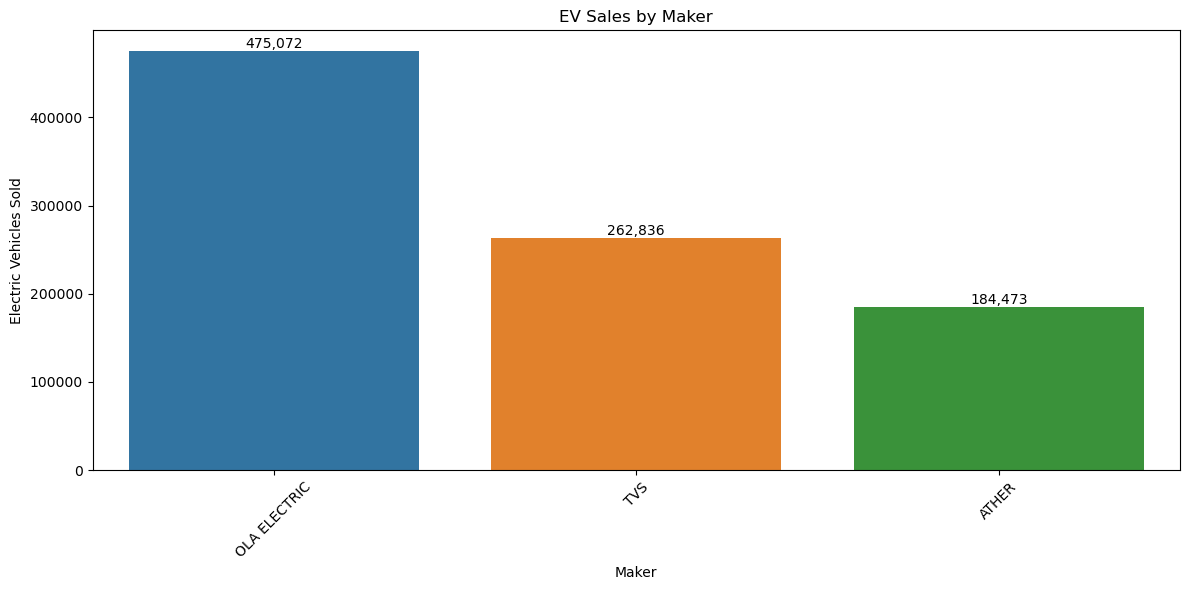

In [19]:
# Create a bar plot for EV sales in top 3 states
plt.figure(figsize=(12, 6))
sns.barplot(x='maker', y='electric_vehicles_sold', data=top_3_makers)

# Annotate each bar with the sales value
for i in range(len(top_3_makers)):
    plt.text(i, 
             top_3_makers['electric_vehicles_sold'].iloc[i] + 100,  # Adding an offset for clarity
             f'{top_3_makers["electric_vehicles_sold"].iloc[i]:,}', 
             ha='center', va='bottom')

# Add labels and title
plt.title('EV Sales by Maker')
plt.xlabel('Maker')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()

In [18]:
print("\nBottom 3 Makers for 2-Wheelers in Fiscal Years 2023 and 2024:")
bottom_3_makers


Bottom 3 Makers for 2-Wheelers in Fiscal Years 2023 and 2024:


,maker,electric_vehicles_sold
8,KINETIC GREEN,9585
7,JITENDRA,8563
3,BATTRE ELECTRIC,4841


In [19]:
# bottom_3_makers.to_csv("bottom_3_makers.csv")

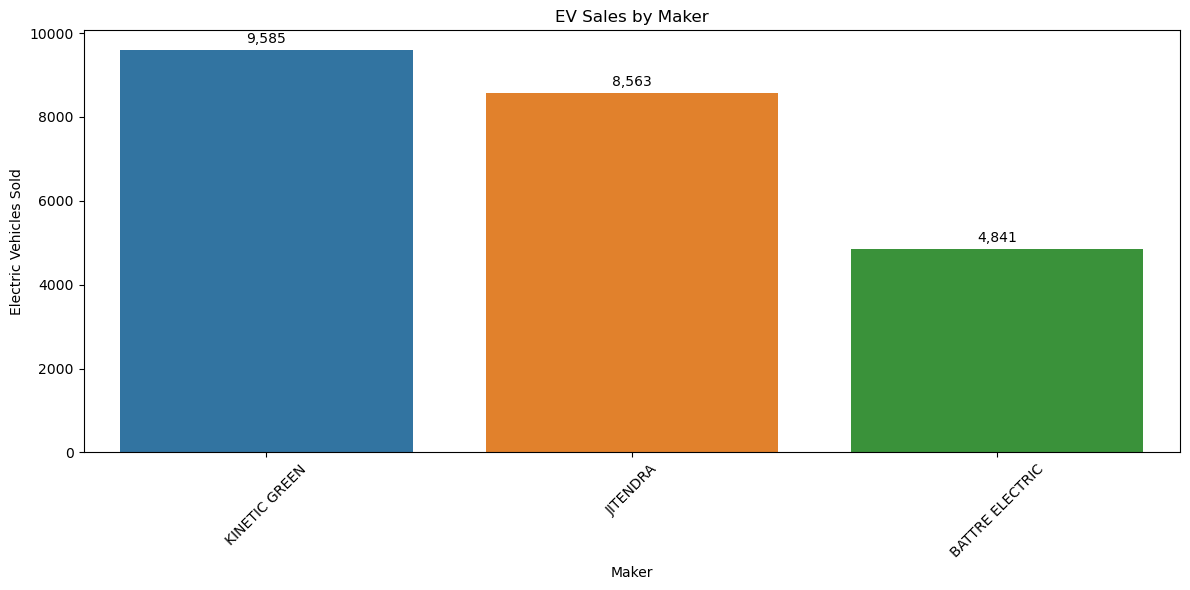

In [20]:
# Create a bar plot for EV sales in top 3 states
plt.figure(figsize=(12, 6))
sns.barplot(x='maker', y='electric_vehicles_sold', data=bottom_3_makers)

# Annotate each bar with the sales value
for i in range(len(bottom_3_makers)):
    plt.text(i, 
             bottom_3_makers['electric_vehicles_sold'].iloc[i] + 100,  # Adding an offset for clarity
             f'{bottom_3_makers["electric_vehicles_sold"].iloc[i]:,}', 
             ha='center', va='bottom')

# Add labels and title
plt.title('EV Sales by Maker')
plt.xlabel('Maker')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### 2.Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024. finding insight and visualization

In [21]:
# Merge the dataframes
merged_df = pd.merge(ev_states, dim_date, on='date')

# Filter for FY 2024
fy_2024_df = merged_df[merged_df['fiscal_year'] == 2024]

# Calculate penetration rate
fy_2024_df['penetration_rate'] = fy_2024_df['electric_vehicles_sold'] / fy_2024_df['total_vehicles_sold'] * 100

C:\Users\chatt\AppData\Local\Temp\ipykernel_26196\3984307482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fy_2024_df['penetration_rate'] = fy_2024_df['electric_vehicles_sold'] / fy_2024_df['total_vehicles_sold'] * 100


In [22]:
# Group by state 3and vehicle category
grouped_df = fy_2024_df.groupby(['state', 'vehicle_category']).agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum',
    'penetration_rate': 'mean'
}).reset_index()

# Get top 5 states for 2-wheelers and 4-wheelers
top_5_2w = grouped_df[grouped_df['vehicle_category'] == '2-Wheelers'].nlargest(5, 'penetration_rate')
top_5_4w = grouped_df[grouped_df['vehicle_category'] == '4-Wheelers'].nlargest(5, 'penetration_rate')

print("Top 5 states with highest penetration rate for 2-wheelers in FY 2024:")
top_5_2w[['state', 'penetration_rate']]


Top 5 states with highest penetration rate for 2-wheelers in FY 2024:


,state,penetration_rate
20,Goa,18.184784
34,Kerala,13.610393
32,Karnataka,11.510878
40,Maharashtra,10.157240
18,Delhi,9.700033


In [23]:
top_5_4w

,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,penetration_rate
35,Kerala,4-Wheelers,9169,159227,42.309117
13,Chandigarh,4-Wheelers,1020,22651,4.914759
21,Goa,4-Wheelers,1031,24234,4.369512
33,Karnataka,4-Wheelers,12878,302221,4.277313
19,Delhi,4-Wheelers,8630,201130,4.263585


In [24]:
#top_5_2w.to_csv("PQ2Top5_2W.csv")

In [25]:
print("\
Top 5 states with highest penetration rate for 4-wheelers in FY 2024:")
top_5_4w[['state', 'penetration_rate']]

Top 5 states with highest penetration rate for 4-wheelers in FY 2024:


,state,penetration_rate
35,Kerala,42.309117
13,Chandigarh,4.914759
21,Goa,4.369512
33,Karnataka,4.277313
19,Delhi,4.263585


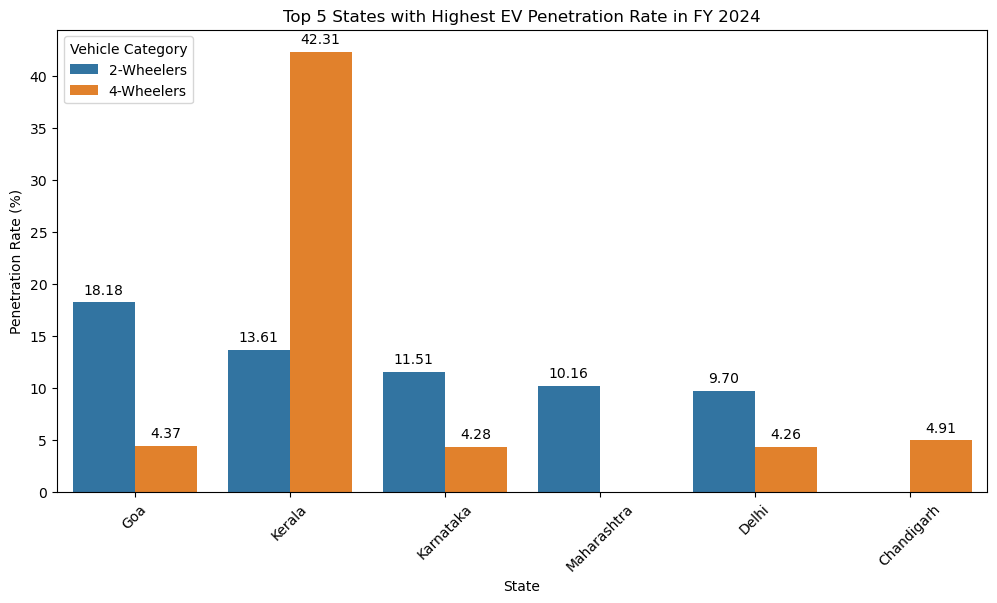

In [26]:

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='state', y='penetration_rate', hue='vehicle_category', 
                 data=pd.concat([top_5_2w, top_5_4w]))
plt.title('Top 5 States with Highest EV Penetration Rate in FY 2024')
plt.xlabel('State')
plt.ylabel('Penetration Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Category')

# Adding the values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Save the figure
plt.savefig("Top 5 States with Highest EV Penetration Rate in FY 2024.png")
plt.show()


In [45]:
# Key insights:

# Kerala leads in 4-wheeler EV penetration at 42.3%, significantly higher than other states.
# Goa tops 2-wheeler EV penetration at 18.2%.
# There's a notable difference between 2-wheeler and 4-wheeler adoption rates across states.
# What aspect of this data would you like to explore next?

###  3. List the states with negative penetration (decline) in EV sales from 2022 to 2024? finding the insights and visualization

In [27]:
ev_sales = merged_df

In [28]:
# Calculate penetration rate
ev_sales['penetration_rate'] = ev_sales['electric_vehicles_sold'] / ev_sales['total_vehicles_sold'] * 100

# Filter for FY 2022 and 2024
fy_2022 = ev_sales[ev_sales['fiscal_year'] == 2022].groupby(['state', 'vehicle_category'])['penetration_rate'].mean().reset_index()
fy_2024 = ev_sales[ev_sales['fiscal_year'] == 2024].groupby(['state', 'vehicle_category'])['penetration_rate'].mean().reset_index()

# Merge 2022 and 2024 data
comparison = fy_2022.merge(fy_2024, on=['state', 'vehicle_category'], suffixes=('_2022', '_2024'))

In [29]:
comparison.head(3)


,state,vehicle_category,penetration_rate_2022,penetration_rate_2024
0,Andaman & Nicobar Island,2-Wheelers,0.000000,0.352874
1,Andaman & Nicobar Island,4-Wheelers,1.355617,0.831866
2,Andhra Pradesh,2-Wheelers,2.030795,4.488726


In [30]:
comparison .isnull().sum()

state                    0
vehicle_category         0
penetration_rate_2022    0
penetration_rate_2024    0
dtype: int64

In [31]:
# Calculate change in penetration rate
comparison['change'] = comparison['penetration_rate_2024'] - comparison['penetration_rate_2022']

# Filter states with negative change
negative_change = comparison[comparison['change'] < 0].sort_values('change')

# Display results
print("States with negative penetration (decline) in EV sales from 2022 to 2024:")
negative_change[['state', 'vehicle_category', 'penetration_rate_2022', 'penetration_rate_2024', 'change']]

States with negative penetration (decline) in EV sales from 2022 to 2024:


,state,vehicle_category,penetration_rate_2022,penetration_rate_2024,change
34,Ladakh,2-Wheelers,5.277778,4.029144,-1.248634
1,Andaman & Nicobar Island,4-Wheelers,1.355617,0.831866,-0.523751


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


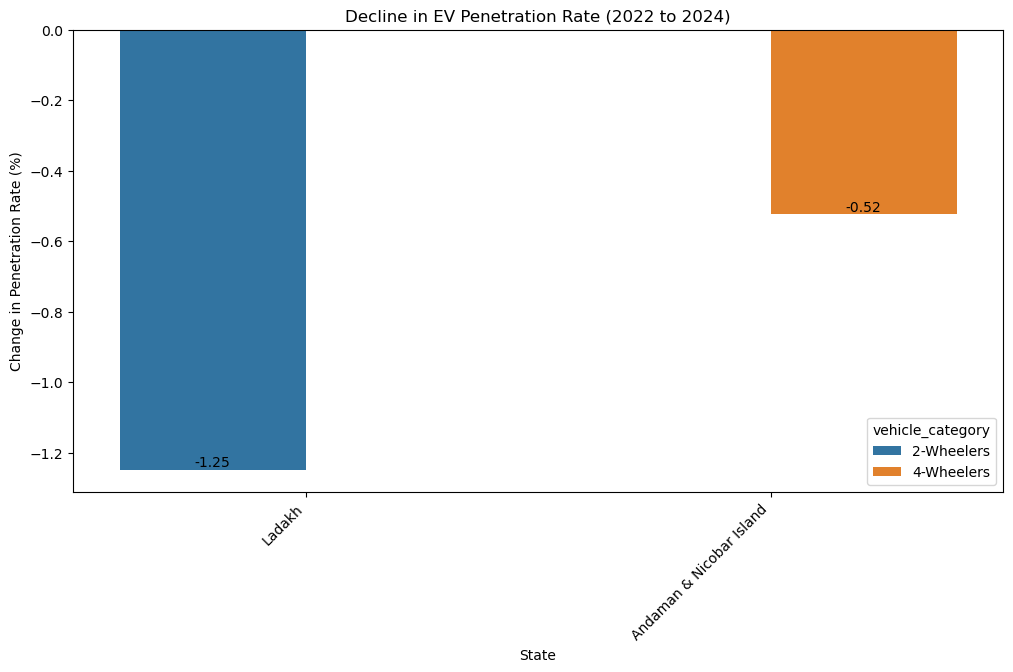

In [33]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='state', y='change', hue='vehicle_category', data=negative_change)
plt.title('Decline in EV Penetration Rate (2022 to 2024)')
plt.xlabel('State')
plt.ylabel('Change in Penetration Rate (%)')
plt.xticks(rotation=45, ha='right')

# Adding numerical values on top of the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        p.get_x() + p.get_width() / 2.,  # X-coordinate: Center of the bar
        height,  # Y-coordinate: Height of the bar
        f'{height:.2f}',  # Format the number with two decimal places
        ha='center',  # Horizontal alignment: Centered
        va='bottom'  # Vertical alignment: Bottom of the text at the top of the bar
    )
plt.savefig("Decline in EV Penetration Rate (2022 to 2024).png")
plt.show()

In [52]:
#negative_change.to_csv("PQ3NegativeChange.csv")

In [53]:
# Key insights:

# Only two states show a decline in EV penetration rates.
# Ladakh experienced a decrease in 2-wheeler EV penetration.
# Andaman & Nicobar Island saw a decline in 4-wheeler EV penetration.
#What aspect of EV sales would you like to explore next?


 # 4. What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024? finding the insights and visualization

In [35]:
# Merge with date dimension to get fiscal year and quarter
ev_makers = ev_makers.merge(dim_date, on='date', how='left')

# Filter for 4-wheelers
ev_sales_4w = ev_makers[ev_makers['vehicle_category'] == '4-Wheelers']

# Identify top 5 EV makers based on total sales volume from 2022 to 2024
top_makers = ev_sales_4w[(ev_sales_4w['fiscal_year'] >= 2022) & (ev_sales_4w['fiscal_year'] <= 2024)]

# Group by maker and sum the sales
top_makers = top_makers.groupby('maker')['electric_vehicles_sold'].sum().nlargest(5).index

# Filter data for top 5 makers
top_makers_data = ev_sales_4w[ev_sales_4w['maker'].isin(top_makers)]

# Aggregate sales data quarterly
top_makers_quarterly = top_makers_data.groupby(['fiscal_year', 'quarter', 'maker'])['electric_vehicles_sold'].sum().reset_index()


C:\Users\chatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


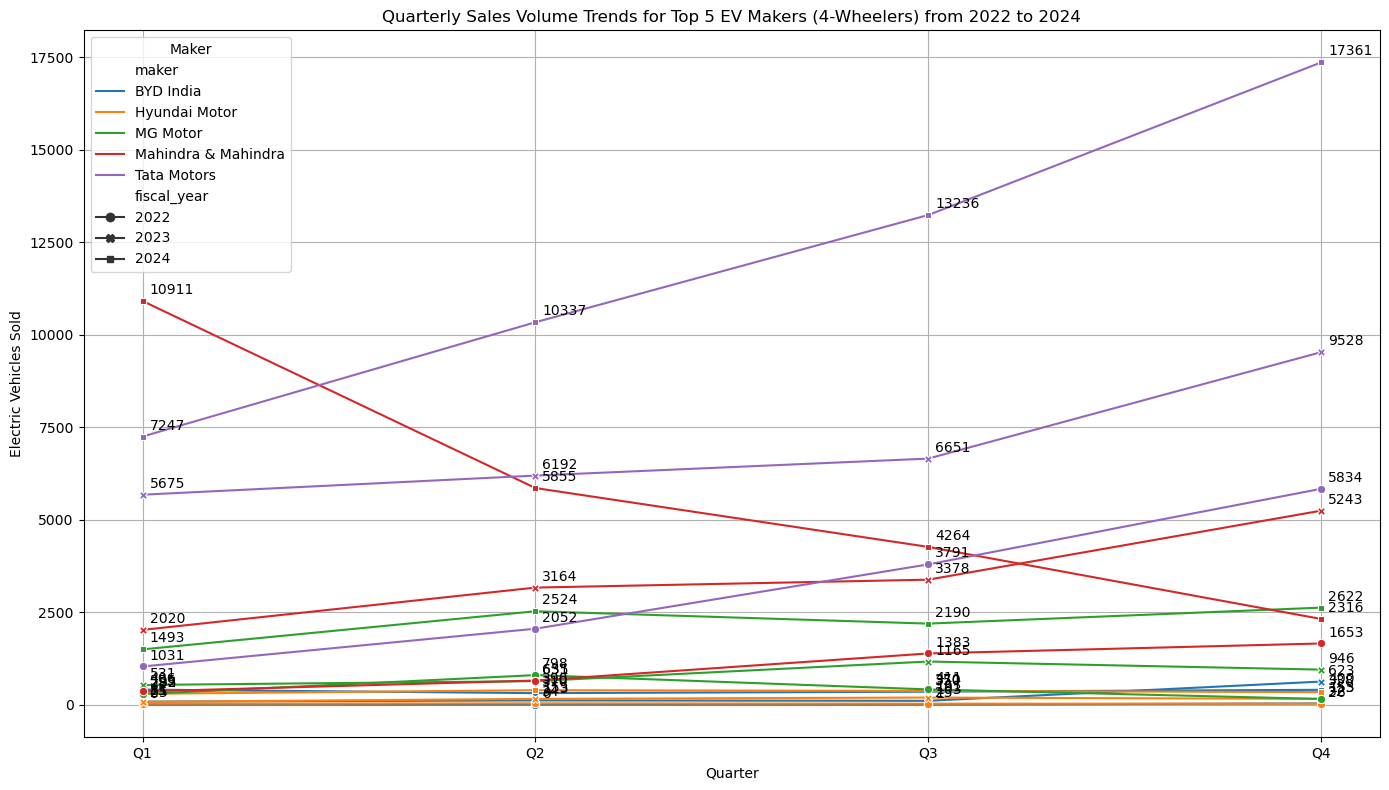

In [36]:
# Visualization
plt.figure(figsize=(14, 8))
ax = sns.lineplot(data=top_makers_quarterly, x='quarter', y='electric_vehicles_sold', 
                  hue='maker', style='fiscal_year', markers=True, dashes=False)
plt.title('Quarterly Sales Volume Trends for Top 5 EV Makers (4-Wheelers) from 2022 to 2024')
plt.xlabel('Quarter')
plt.ylabel('Electric Vehicles Sold')
plt.legend(title='Maker')
plt.grid(True)
plt.tight_layout()

# Adding the values on the plot
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(f'{y:.0f}', xy=(x, y), xytext=(5, 5), textcoords='offset points')
plt.savefig("Quarterly Sales Volume Trends for Top 5 EV Makers (4-Wheelers) from 2022 to 2024.png")

plt.show()

In [56]:
#Key insights:

#Only two states show a decline in EV penetration rates.
#Ladakh experienced a decrease in 2-wheeler EV penetration.
#Andaman & Nicobar Island saw a decline in 4-wheeler EV penetration.
#What aspect of EV sales would you like to explore next?

In [57]:
#The visualization for the quarterly sales volume trends for the top 5 EV makers (4-wheelers) from 2022 to 2024 has been saved.

#You can view the visualization here.

#Key insights:

#The trends show the quarterly sales volumes for the top 5 EV makers.
#he data is segmented by fiscal year and quarter, providing a clear view of the sales performance over time

### 5. How do the EV sales and penetration rates in Delhi compare toKarnataka for 2024? finding insights and visualization

In [37]:
# Convert date to datetime
ev_states['date'] = pd.to_datetime(ev_states['date'], format='%d-%b-%y')
ev_makers['date'] = pd.to_datetime(ev_makers['date'], format='%d-%b-%y')
dim_date['date'] = pd.to_datetime(dim_date['date'], format='%d-%b-%y')

In [38]:
# Merge with date dimension to get fiscal year
ev_sales_states = ev_states.merge(dim_date, on='date', how='left')

# Filter for Delhi and Karnataka in 2024
states_data = ev_sales_states[(ev_sales_states['state'].isin(['Delhi', 'Karnataka'])) & (ev_sales_states['fiscal_year'] == 2024)]

# Calculate EV penetration rate
states_data['ev_penetration'] = states_data['electric_vehicles_sold'] / states_data['total_vehicles_sold'] * 100

# Aggregate data
summary = states_data.groupby(['state', 'vehicle_category']).agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum',
    'ev_penetration': 'mean'
}).reset_index()

summary

C:\Users\chatt\AppData\Local\Temp\ipykernel_26196\3705741392.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_data['ev_penetration'] = states_data['electric_vehicles_sold'] / states_data['total_vehicles_sold'] * 100


,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration
0,Delhi,2-Wheelers,38094,405218,9.700033
1,Delhi,4-Wheelers,8630,201130,4.263585
2,Karnataka,2-Wheelers,148111,1279767,11.510878
3,Karnataka,4-Wheelers,12878,302221,4.277313


In [39]:
#summary.to_csv("PQ5summary.csv")

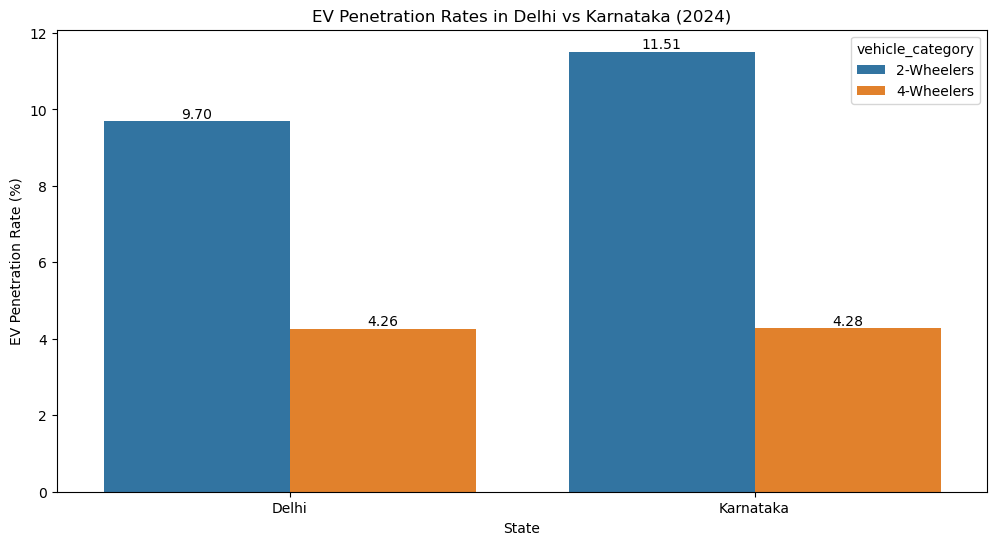

In [40]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='state', y='ev_penetration', hue='vehicle_category', data=summary)
plt.title('EV Penetration Rates in Delhi vs Karnataka (2024)')
plt.xlabel('State')
plt.ylabel('EV Penetration Rate (%)')

# Adding numerical values on top of the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        p.get_x() + p.get_width() / 2.,  # X-coordinate: Center of the bar
        height,  # Y-coordinate: Height of the bar
        f'{height:.2f}',  # Format the number with two decimal places
        ha='center',  # Horizontal alignment: Centered
        va='bottom'  # Vertical alignment: Bottom of the text at the top of the bar
    )

plt.savefig('delhi_karnataka_ev_comparison_2024.png')  # Save the figure if needed
plt.show()

Key observations:

Karnataka has higher EV penetration rates for both 2-wheelers and 4-wheelers compared to Delhi. 2-wheelers have significantly higher penetration rates than 4-wheelers in both states. Karnataka's 2-wheeler EV penetration is about 11.5%, while Delhi's is around 9.7%. 4-wheeler EV penetration is similar in both states, at approximately 4.3%

###  6. List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024. finding the insights and visualization

In [41]:
ev_sales_4w

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
9,2021-04-01,4-Wheelers,BYD India,0,2022,Q1
10,2021-04-01,4-Wheelers,PCA Automobiles,0,2022,Q1
11,2021-04-01,4-Wheelers,BMW India,0,2022,Q1
12,2021-04-01,4-Wheelers,Volvo Auto India,0,2022,Q1
13,2021-04-01,4-Wheelers,KIA Motors,0,2022,Q1
...,...,...,...,...,...,...
364,2024-03-01,4-Wheelers,PCA Automobiles,130,2024,Q4
365,2024-03-01,4-Wheelers,BMW India,55,2024,Q4
366,2024-03-01,4-Wheelers,Mercedes -Benz AG,31,2024,Q4
367,2024-03-01,4-Wheelers,Volvo Auto India,39,2024,Q4


In [42]:

# Merge with date dimension to get fiscal year
ev_sales = ev_makers.merge(dim_date, on='date', how='left')
ev_sales

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year_x,quarter_x,fiscal_year_y,quarter_y
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2022,Q1
1,2022-04-01,2-Wheelers,OKAYA EV,0,2023,Q1,2023,Q1
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2022,Q1
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,2022,Q1
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,2022,Q2,2022,Q2
...,...,...,...,...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070,2024,Q4,2024,Q4
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625,2024,Q4,2024,Q4
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915,2024,Q4,2024,Q4
814,2024-03-01,2-Wheelers,REVOLT,585,2024,Q4,2024,Q4


In [43]:
# Filter for 4-wheelers and years 2022-2024
ev_sales_4w = ev_sales[(ev_sales['vehicle_category'] == '4-Wheelers') & 
                       (ev_sales['fiscal_year_x'].isin([2022, 2023, 2024]))]

In [44]:
# Group by maker and fiscal year, then sum the sales
yearly_sales = ev_sales_4w.groupby(['maker', 'fiscal_year_x'])['electric_vehicles_sold'].sum().reset_index()

# Pivot the data to have years as columns
sales_pivot = yearly_sales.pivot(index='maker', columns='fiscal_year_x', values='electric_vehicles_sold').reset_index()
sales_pivot.columns.name = None

# Calculate CAGR
sales_pivot['CAGR'] = ((sales_pivot[2024] / sales_pivot[2022]) ** (1/2) - 1) * 100


In [45]:
sales_pivot.head(3)

,maker,2022,2023,2024,CAGR
0,BMW India,7,285,1078,1140.967365
1,BYD India,33,920,1466,566.515134
2,Hyundai Motor,110,576,1390,255.476633


In [46]:
sales_pivot.isnull().sum()

maker    0
2022     0
2023     0
2024     0
CAGR     0
dtype: int64

In [47]:
# Sort by 2024 sales to get top 5 makers
top_5_makers = sales_pivot.sort_values(2024, ascending=False).head(5)

In [48]:
# Calculate total sales for each year
top_5_makers['Total_2022'] = top_5_makers[2022].sum()
top_5_makers['Total_2023'] = top_5_makers[2023].sum()
top_5_makers['Total_2024'] = top_5_makers[2024].sum()

# Calculate market share for each year
for year in [2022, 2023, 2024]:
    top_5_makers[f'Market_Share_{year}'] = top_5_makers[year] / top_5_makers[f'Total_{year}'] * 100

# Assuming 'top_5_makers' is your DataFrame
top_5_makers['CAGR'] = top_5_makers['CAGR'].replace(float('inf'), 1140.967365)
    # Sort by CAGR
top_5_makers = top_5_makers.sort_values('CAGR', ascending=False)
top_5_makers
#print(top_5_makers[['maker', 2022, 2023, 2024, 'CAGR', 'Market_Share_2022', 'Market_Share_2023', 'Market_Share_2024']])

,maker,2022,2023,2024,CAGR,Total_2022,Total_2023,Total_2024,Market_Share_2022,Market_Share_2023,Market_Share_2024
7,PCA Automobiles,0,151,1533,1140.967365,18430,46199,83355,0.000000,0.326847,1.839122
1,BYD India,33,920,1466,566.515134,18430,46199,83355,0.179056,1.991385,1.758743
5,Mahindra & Mahindra,4042,13805,23346,140.330055,18430,46199,83355,21.931633,29.881599,28.007918
4,MG Motor,1647,3277,8829,131.530899,18430,46199,83355,8.936517,7.093227,10.592046
8,Tata Motors,12708,28046,48181,94.714952,18430,46199,83355,68.952794,60.706942,57.802171


In [49]:
top_5_makers.to_csv("PQ66top_5_makers.csv")

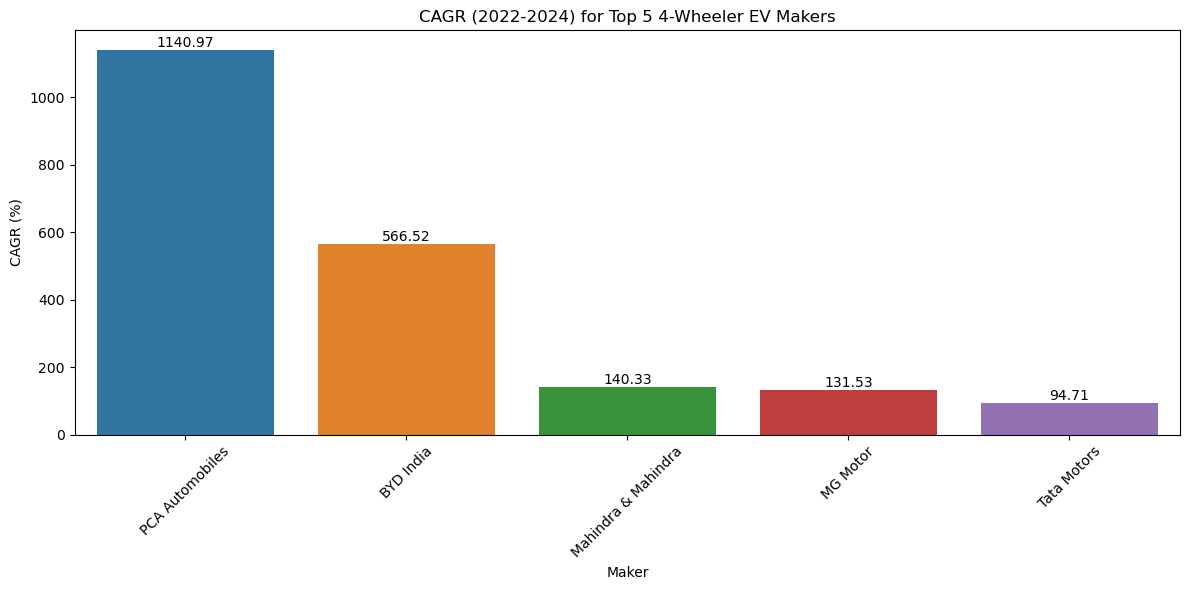

In [50]:
# Visualization
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='maker', y='CAGR', data=top_5_makers)
plt.title('CAGR (2022-2024) for Top 5 4-Wheeler EV Makers')
plt.xlabel('Maker')
plt.ylabel('CAGR (%)')
plt.xticks(rotation=45)

# Adding numerical values on top of the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        p.get_x() + p.get_width() / 2.,  # X-coordinate: Center of the bar
        height,  # Y-coordinate: Height of the bar
        f'{height:.2f}',  # Format the number with two decimal places
        ha='center',  # Horizontal alignment: Centered
        va='bottom'  # Vertical alignment: Bottom of the text at the top of the bar
    )

plt.tight_layout()
plt.savefig('top_5_ev_makers_cagr.png')  # Save the figure if needed
plt.show()

In [72]:
top_5_makers.to_csv("PQ6top_5_makers.csv")

In [51]:
# Market share visualization
market_share_data = top_5_makers.melt(id_vars=['maker'], 
                                      value_vars=['Market_Share_2022', 'Market_Share_2023', 'Market_Share_2024'],
                                      var_name='Year', value_name='Market_Share')
market_share_data['Year'] = market_share_data['Year'].str.extract('(\d+)').astype(int)

C:\Users\chatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


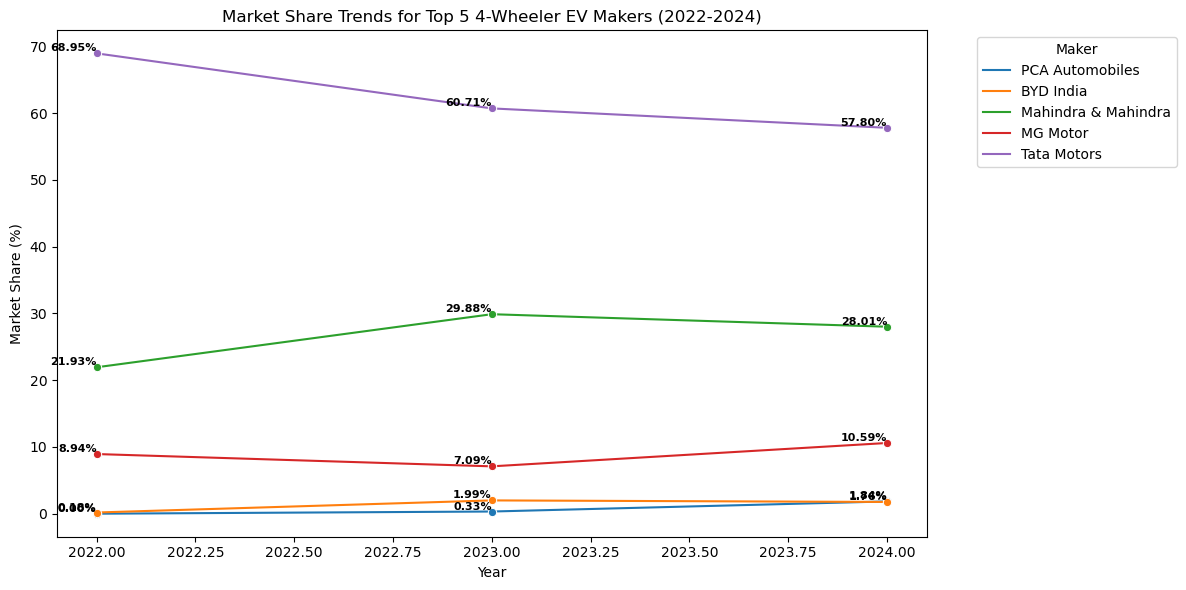

In [53]:
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(x='Year', y='Market_Share', hue='maker', data=market_share_data, marker='o')
plt.title('Market Share Trends for Top 5 4-Wheeler EV Makers (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(title='Maker', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding numerical values at each data point
for maker in market_share_data['maker'].unique():
    maker_data = market_share_data[market_share_data['maker'] == maker]
    for x, y in zip(maker_data['Year'], maker_data['Market_Share']):
        plt.text(
            x, y, f'{y:.2f}%', 
            ha='right', va='bottom', 
            fontsize=8, 
            color='black', 
            weight='bold'
        )

plt.tight_layout()
plt.savefig('top_5_ev_makers_market_share.png')  # Save the figure if needed
plt.show()

In [49]:
market_share_data.to_csv("PQ6market_share_data.csv")

Key insights:

BYD India shows the highest CAGR at 566.52%, but started from a low base in 2022.
Tata Motors maintains the largest market share, but it's declining over the years.
Mahindra & Mahindra and MG Motor show strong growth in both CAGR and market share.
PCA Automobiles is a new entrant, showing rapid growth from 2023 to 2024.

 ### 7.List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold. finding insights and visulaization

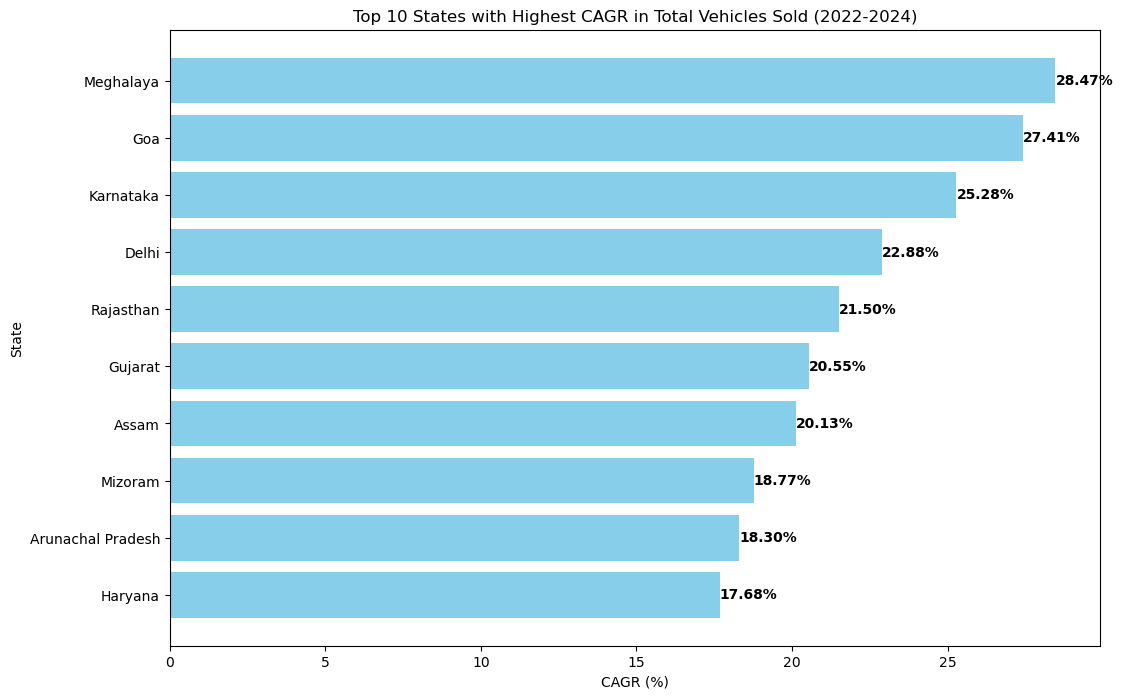

In [84]:
# This code calculates the Compound Annual Growth Rate (CAGR) for total vehicles sold in each state from 2022 to 2024 and lists the top 10 states with the highest CAGR. It also visualizes the results.



# Merge the dataframes on the date column
df = pd.merge(ev_states, dim_date, on='date')

# Filter the data for the years 2022 and 2024
df_2022 = df[df['fiscal_year'] == 2022]
df_2024 = df[df['fiscal_year'] == 2024]

# Group by state and sum the total vehicles sold
df_2022_grouped = df_2022.groupby('state')['total_vehicles_sold'].sum().reset_index()
df_2024_grouped = df_2024.groupby('state')['total_vehicles_sold'].sum().reset_index()

# Merge the grouped dataframes on the state column
df_merged = pd.merge(df_2022_grouped, df_2024_grouped, on='state', suffixes=('_2022', '_2024'))

# Calculate the CAGR
df_merged['CAGR'] = ((df_merged['total_vehicles_sold_2024'] / df_merged['total_vehicles_sold_2022']) ** (1/2) - 1) * 100

# Sort the dataframe by CAGR in descending order and get the top 10 states
df_top_10 = df_merged.sort_values(by='CAGR', ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 8))
bars = plt.barh(df_top_10['state'], df_top_10['CAGR'], color='skyblue')
plt.xlabel('CAGR (%)')
plt.ylabel('State')
plt.title('Top 10 States with Highest CAGR in Total Vehicles Sold (2022-2024)')

# Adding numerical values to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width, bar.get_y() + bar.get_height() / 2, 
        f'{width:.2f}%',  # Format the number with two decimal places and add a percentage sign
        ha='left', va='center', 
        fontsize=10, 
        color='black', 
        weight='bold'
    )

plt.gca().invert_yaxis()
plt.savefig('top_10_states_cagr.png')
plt.show()

# Save the results to a CSV file
#df_top_10.to_csv('top_10_states_cagr.csv', index=False)



In [85]:
df_top_10

,state,total_vehicles_sold_2022,total_vehicles_sold_2024,CAGR
21,Meghalaya,22193,36628,28.469075
9,Goa,48372,78524,27.410196
15,Karnataka,1007894,1581988,25.283582
8,Delhi,401540,606348,22.884347
27,Rajasthan,880985,1300476,21.497380
10,Gujarat,1094872,1590987,20.545677
3,Assam,379450,547626,20.133672
22,Mizoram,19439,27422,18.771599
2,Arunachal Pradesh,19929,27892,18.303359
11,Haryana,528591,732029,17.680434


In [56]:
# Merge the dataframes on the date column
df = pd.merge(ev_states, dim_date, on='date')
df.head(2)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,2021-04-01,Sikkim,2-Wheelers,0,398,2022,Q1
1,2021-04-01,Sikkim,4-Wheelers,0,361,2022,Q1


In [57]:

# Filter the data for the years 2022 and 2024
df_2022 = df[df['fiscal_year'] == 2022]
df_2024 = df[df['fiscal_year'] == 2024]

# Group by state and sum the total vehicles sold
df_2022_grouped = df_2022.groupby('state')['total_vehicles_sold'].sum().reset_index()
df_2024_grouped = df_2024.groupby('state')['total_vehicles_sold'].sum().reset_index()


In [58]:
df_2022.head(3)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,2021-04-01,Sikkim,2-Wheelers,0,398,2022,Q1
1,2021-04-01,Sikkim,4-Wheelers,0,361,2022,Q1
2,2021-04-01,Andaman & Nicobar Island,2-Wheelers,0,515,2022,Q1


In [59]:
df_top_10 = df_merged.sort_values(by='CAGR', ascending=False).head(10)

In [82]:
#df_top_10.to_csv("PQ7df_top_10.csv")

### 8. What are the peak and low season months for EV sales based on the data from 2022 to 2024? finding insights and visualization

In [60]:
df.head(2)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,2021-04-01,Sikkim,2-Wheelers,0,398,2022,Q1
1,2021-04-01,Sikkim,4-Wheelers,0,361,2022,Q1


In [61]:
# Filter data for the years 2022 to 2024
dft = df[(df['date'].dt.year >= 2022) & (df['date'].dt.year <= 2024)]

In [62]:
# Group by month and year to find total EV sales per month
dft['month'] = dft['date'].dt.month
dft['year'] = dft['date'].dt.year
monthly_sales = dft.groupby(['year', 'month'])['electric_vehicles_sold'].sum().reset_index()


C:\Users\chatt\AppData\Local\Temp\ipykernel_26196\932998076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['month'] = dft['date'].dt.month
C:\Users\chatt\AppData\Local\Temp\ipykernel_26196\932998076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['year'] = dft['date'].dt.year


In [89]:
monthly_sales.to_csv("PQ8monthly_sales.csv")

In [63]:

# Find peak and low season months
peak_month = monthly_sales.loc[monthly_sales['electric_vehicles_sold'].idxmax()]
low_month = monthly_sales.loc[monthly_sales['electric_vehicles_sold'].idxmin()]

C:\Users\chatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


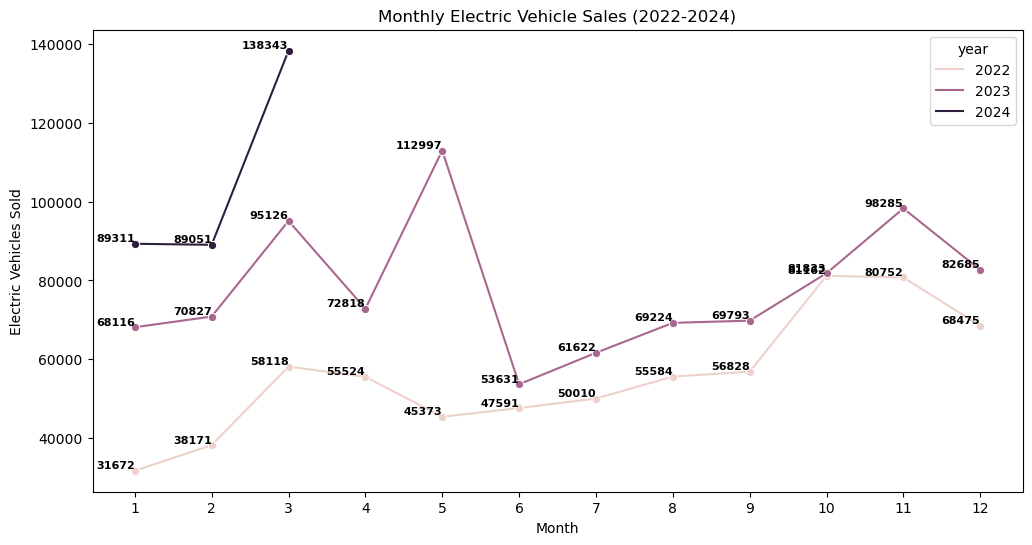

In [64]:


plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=monthly_sales, x='month', y='electric_vehicles_sold', hue='year', marker='o')
plt.title('Monthly Electric Vehicle Sales (2022-2024)')
plt.xlabel('Month')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(range(1, 13))

# Adding numerical values at each data point
for year in monthly_sales['year'].unique():
    year_data = monthly_sales[monthly_sales['year'] == year]
    for x, y in zip(year_data['month'], year_data['electric_vehicles_sold']):
        plt.text(
            x, y, f'{y}', 
            ha='right', va='bottom', 
            fontsize=8, 
            color='black', 
            weight='bold'
        )

plt.savefig('monthly_ev_sales_lineplot.png')  # Save the figure if needed
plt.show()

In [58]:
 # monthly_avg.to_csv("PQ8monthly_avg.csv")

Summary:
The peak month for EV sales is March 2024 with 138,343 vehicles sold.
The low month for EV sales is January 2022 with 31,672 vehicles sold.
The highest average monthly sales occur in March, followed by November and October.

 #### 9.What is the projected number of EV sales (including 2-wheelers and 4-wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years?finding insights and visualization

In [66]:
df = pd.merge(ev_states, dim_date, on='date')

In [67]:
# Calculate the total EV sales by state and year
df['year'] = df['date'].dt.year
state_year_sales = df.groupby(['state', 'year'])['electric_vehicles_sold'].sum().reset_index()

In [68]:
state_year_sales.head(2)

,state,year,electric_vehicles_sold
0,Andaman & Nicobar,2024,2
1,Andaman & Nicobar Island,2021,20


In [69]:
# Calculate the CAGR for each state
def calculate_cagr(start_value, end_value, periods):
    if periods == 0 or start_value == 0:  # Avoid division by zero
        return np.nan
    return (end_value / start_value) ** (1 / periods) - 1

In [70]:
cagr_list = []
for state in state_year_sales['state'].unique():
    state_data = state_year_sales[state_year_sales['state'] == state]
    start_year = state_data['year'].min()
    end_year = state_data['year'].max()
    start_value = state_data[state_data['year'] == start_year]['electric_vehicles_sold'].values[0]
    end_value = state_data[state_data['year'] == end_year]['electric_vehicles_sold'].values[0]
    periods = end_year - start_year
    cagr = calculate_cagr(start_value, end_value, periods)
    cagr_list.append({'state': state, 'cagr': cagr})

cagr_df = pd.DataFrame(cagr_list)
cagr_df.head(2)

,state,cagr
0,Andaman & Nicobar,NaN
1,Andaman & Nicobar Island,-0.233691


In [71]:
cagr_df.isnull().sum()

state    0
cagr     4
dtype: int64

In [72]:
cagr_dff = cagr_df.fillna(0)

In [73]:
cagr_dff

,state,cagr
0,Andaman & Nicobar,0.000000
1,Andaman & Nicobar Island,-0.233691
2,Andhra Pradesh,0.236988
3,Arunachal Pradesh,0.000000
4,Assam,0.579717
5,Bihar,0.281394
6,Chandigarh,0.391808
7,Chhattisgarh,0.546286
8,DNH and DD,0.722550
9,Delhi,0.179164


In [74]:
# Get the top 10 states by CAGR
top_10_states = cagr_dff.nlargest(10, 'cagr')
top_10_states.head(2)

,state,cagr
31,Tripura,2.391211
22,Meghalaya,1.537221


In [75]:
# Project the EV sales for 2030
projection_year = 2030
projection_list = []
for index, row in top_10_states.iterrows():
    state = row['state']
    cagr = row['cagr']
    end_year = state_year_sales[state_year_sales['state'] == state]['year'].max()
    end_value = state_year_sales[(state_year_sales['state'] == state) & (state_year_sales['year'] == end_year)]['electric_vehicles_sold'].values[0]
    periods = projection_year - end_year
    projected_value = end_value * (1 + cagr) ** periods if not pd.isna(cagr) else np.nan
    projection_list.append({'state': state, 'projected_ev_sales_2030': projected_value})

projection_df = round(pd.DataFrame(projection_list).sort_values(by = "projected_ev_sales_2030",ascending=False),3)

In [76]:
projection_df

,state,projected_ev_sales_2030
6,Uttar Pradesh,297886.200
9,Kerala,250878.561
2,West Bengal,158875.398
0,Tripura,118638.000
7,Chhattisgarh,115981.884
4,Goa,71357.499
5,Assam,21197.806
8,Puducherry,15111.724
1,Meghalaya,13072.111
3,DNH and DD,2403.358


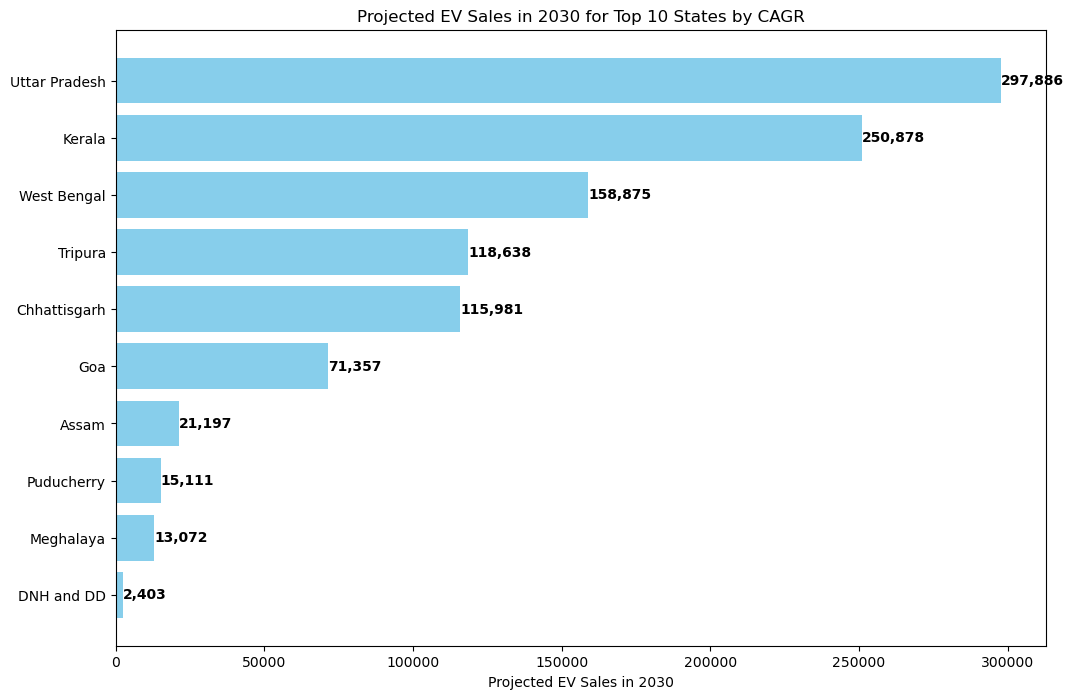

In [77]:
plt.figure(figsize=(12, 8))
bars = plt.barh(projection_df['state'], projection_df['projected_ev_sales_2030'], color='skyblue')
plt.xlabel('Projected EV Sales in 2030')
plt.title('Projected EV Sales in 2030 for Top 10 States by CAGR')

# Adding numerical values to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width, bar.get_y() + bar.get_height() / 2, 
        f'{int(width):,}',  # Format the number with commas for thousands
        ha='left', va='center',
        fontsize=10, 
        color='black', 
        weight='bold'
    )
plt.savefig("Projected EV Sales in 2030 for Top 10 States by CAGR.png")
plt.gca().invert_yaxis()
plt.show()

In [195]:
projection_df.to_csv("PQ9projection_df.csv")

### 10.Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price. H finding the insights and visualization

In [82]:

ev_state = pd.read_csv('electric_vehicle_sales_by_state.csv', encoding='UTF-8-SIG')

# Convert date to datetime and extract year
ev_state['date'] = pd.to_datetime(ev_state['date'], format='%d-%b-%y')
ev_state['year'] = ev_state['date'].dt.year

# Define average unit prices
price_4w = 1500000  # in INR
price_2w = 85000  # in INR

# Filter data for 4-Wheelers and 2-Wheelers
sales_4w = ev_state[ev_state['vehicle_category'] == '4-Wheelers']
sales_2w = ev_state[ev_state['vehicle_category'] == '2-Wheelers']

# Group by year and sum the sales for each category
yearly_sales_4w = sales_4w.groupby('year')['electric_vehicles_sold'].sum()
yearly_sales_2w = sales_2w.groupby('year')['electric_vehicles_sold'].sum()

# Calculate revenue for each year and category
revenue_4w = yearly_sales_4w * price_4w
revenue_2w = yearly_sales_2w * price_2w

# Calculate growth rates
growth_rate_4w_2022_2024 = ((revenue_4w[2024] - revenue_4w[2022]) / revenue_4w[2022] * 100).round(2)
growth_rate_4w_2023_2024 = ((revenue_4w[2024] - revenue_4w[2023]) / revenue_4w[2023] * 100).round(2)
growth_rate_2w_2022_2024 = ((revenue_2w[2024] - revenue_2w[2022]) / revenue_2w[2022] * 100).round(2)
growth_rate_2w_2023_2024 = ((revenue_2w[2024] - revenue_2w[2023]) / revenue_2w[2023] * 100).round(2)

print("Revenue Growth Rate for 4-Wheelers (2022 vs 2024):", growth_rate_4w_2022_2024, "%")
print("Revenue Growth Rate for 4-Wheelers (2023 vs 2024):", growth_rate_4w_2023_2024, "%")
print("Revenue Growth Rate for 2-Wheelers (2022 vs 2024):", growth_rate_2w_2022_2024, "%")
print("Revenue Growth Rate for 2-Wheelers (2023 vs 2024):", growth_rate_2w_2023_2024, "%")



Revenue Growth Rate for 4-Wheelers (2022 vs 2024): -37.66 %
Revenue Growth Rate for 4-Wheelers (2023 vs 2024): -70.3 %
Revenue Growth Rate for 2-Wheelers (2022 vs 2024): -53.59 %
Revenue Growth Rate for 2-Wheelers (2023 vs 2024): -65.81 %


In [83]:
# Define the labels and corresponding growth rates
labels = ['4W 2022-2024', '4W 2023-2024', '2W 2022-2024', '2W 2023-2024']
growth_rates = [growth_rate_4w_2022_2024, growth_rate_4w_2023_2024, growth_rate_2w_2022_2024, growth_rate_2w_2023_2024]
colors = ['blue', 'blue', 'green', 'green']
df = pd.DataFrame({"labels":labels,"growth_rates":growth_rates,"colors":colors})
#df.to_csv("PQ10Growthrate.csv")
df

,labels,growth_rates,colors
0,4W 2022-2024,-37.66,blue
1,4W 2023-2024,-70.30,blue
2,2W 2022-2024,-53.59,green
3,2W 2023-2024,-65.81,green


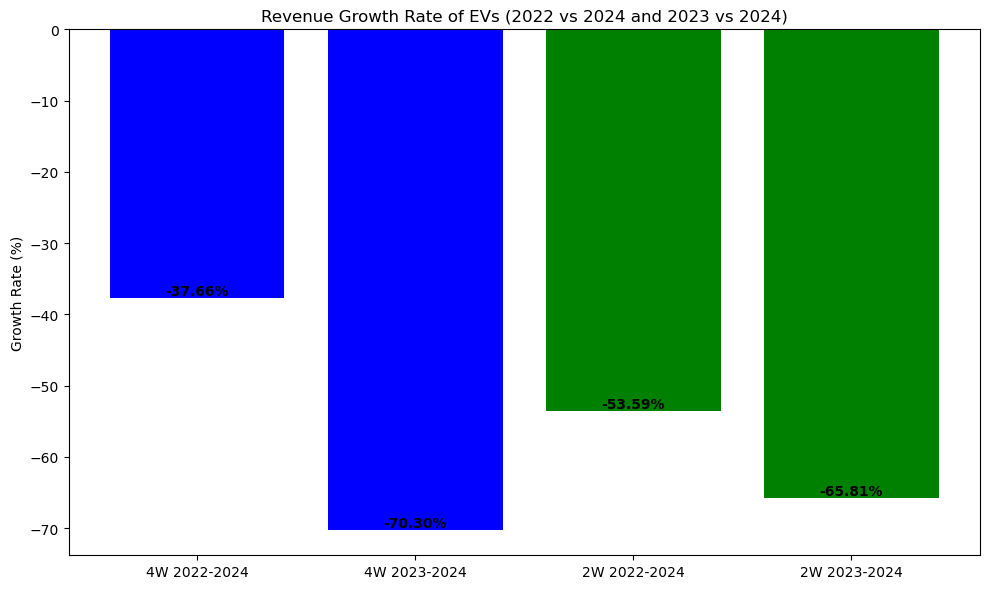

In [81]:
# Define the labels and corresponding growth rates
labels = ['4W 2022-2024', '4W 2023-2024', '2W 2022-2024', '2W 2023-2024']
growth_rates = [growth_rate_4w_2022_2024, growth_rate_4w_2023_2024, growth_rate_2w_2022_2024, growth_rate_2w_2023_2024]
colors = ['blue', 'blue', 'green', 'green']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, growth_rates, color=colors)
plt.title('Revenue Growth Rate of EVs (2022 vs 2024 and 2023 vs 2024)')
plt.ylabel('Growth Rate (%)')

# Adding numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, 
        f'{height:.2f}%',  # Format the number with two decimal places
        ha='center', va='bottom', 
        fontsize=10, 
        color='black', 
        weight='bold'
    )

plt.tight_layout()
plt.savefig('ev_revenue_growth_rate.png')  # Save the figure if needed
plt.show()